#PROJECT CODES

##Importing Libraries

###Standard Libraries for DAta Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Sklearn Modules for Data Preprocesssing

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Sklearn modules for Model Selection

In [3]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

###Sklearn modules for Model Evaluation & Improvement

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import RandomizedSearchCV

###Standard libraries for data visualization

In [5]:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

###Miscellaneous Utilitiy Libraries

In [6]:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

##DATA Exploration

In [7]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRIblPNQb-TaYCVQZDgKTEXPKDvE4Gh7bnXW0lf4rXwYszCTWFQMI85VOZ2qpW31EyH8ufBcAsd7zS5/pub?gid=1736960789&single=true&output=csv'
dataset = pd.read_csv(url) 
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Years_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Dates_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,710812533,Attrited Customer,46,F,3,High School,Single,Unknown,Silver,36,3,4,2,17/10/2020,3,34516.0,154,34362.0,0.60,1987,46,0.59,0.00
1,714145233,Attrited Customer,34,M,0,Graduate,Divorced,$80K - $120K,Silver,24,2,1,2,12/10/2020,3,34516.0,400,34116.0,0.20,5112,49,0.26,0.01
2,798022683,Attrited Customer,43,M,1,Graduate,Married,$80K - $120K,Blue,37,3,4,2,30/09/2020,3,25517.0,321,25196.0,0.77,2508,44,0.29,0.01
3,714294183,Attrited Customer,54,M,1,Graduate,Divorced,$80K - $120K,Blue,44,4,1,3,12/09/2020,3,9580.0,132,9448.0,0.32,5385,51,0.31,0.01
4,720815208,Attrited Customer,52,M,0,High School,Single,$120K +,Blue,39,3,5,3,23/09/2020,3,34516.0,216,34300.0,0.56,2395,47,0.31,0.01


In [8]:
dataset =dataset.drop(columns='Dates_Inactive_12_mon')

dataset.columns.to_series().groupby(dataset.dtypes).groups

dataset.info()

dataset.isna().any()


dataset["Attrition_Flag"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Years_on_Book             10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

##DATA Visualization

###Create a label encoder object
###Label Encoding will be used for columns with 2 or less unique values

In [9]:
le = LabelEncoder()
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [10]:
dataset2 = dataset[['Customer_Age', 'Gender','Dependent_count', 'Months_on_book', 'Years_on_Book','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 
            'Credit_Limit','Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

###Histograms of Numerical Columns

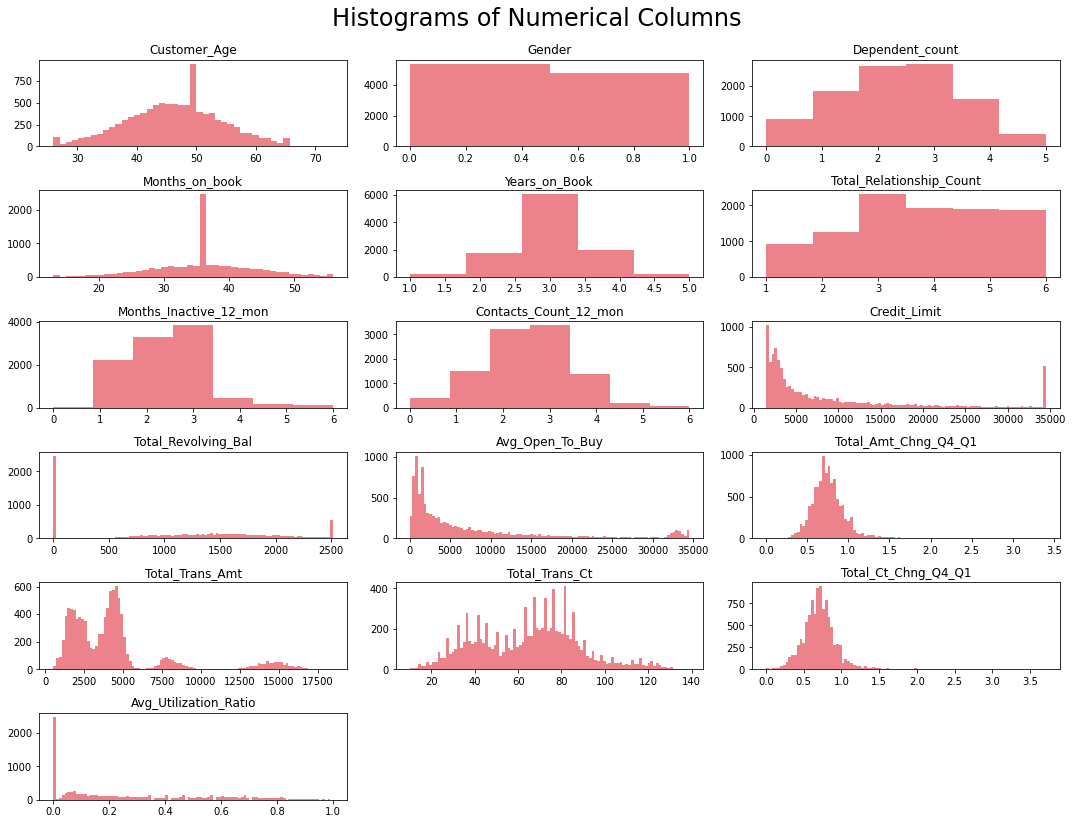

In [ ]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

###Card_Category VS Customers

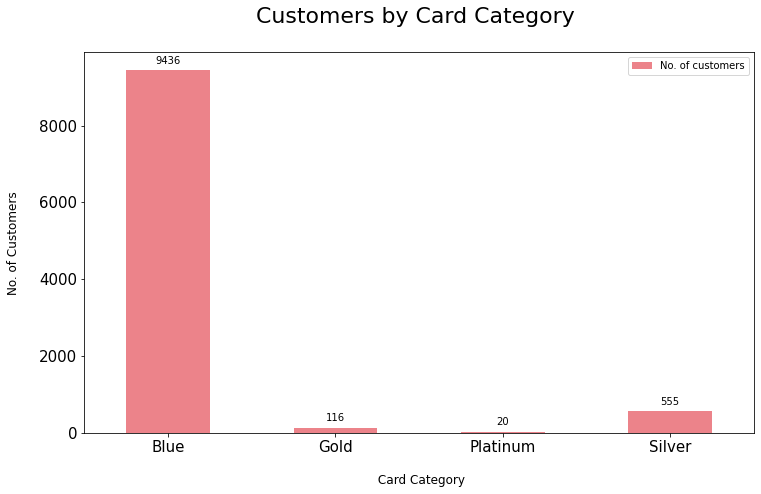

In [ ]:
Card_Category = dataset[[ 'CLIENTNUM','Card_Category']]
sectors = Card_Category.groupby ('Card_Category')
Card_Category = pd.DataFrame(sectors['CLIENTNUM'].count())
Card_Category.rename(columns={'CLIENTNUM':'No. of customers'}, inplace=True)
ax =  Card_Category[["No. of customers"]].plot.bar(title = 'Customers by Card Category',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Card Category',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Card Category \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(Card_Category[["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(label,                      
            (x_value, y_value),         
            xytext=(0, space),textcoords="offset points", 
            ha='center',va=va)  
        
add_value_labels(ax)

###Marital Status VS Customers

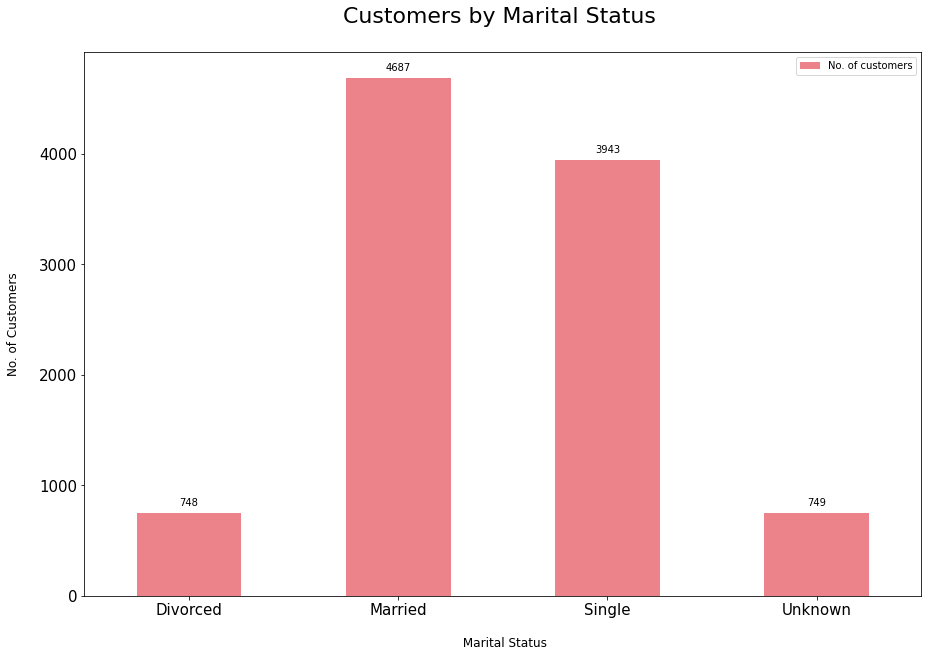

In [ ]:
Marital_status = dataset[[ "CLIENTNUM", "Marital_Status"]]
sectors = Marital_status.groupby ("Marital_Status")
Marital_status  = pd.DataFrame(sectors["CLIENTNUM"].count())
Marital_status.rename(columns={'CLIENTNUM':'No. of customers'}, inplace=True)
ax =  Marital_status [["No. of customers"]].plot.bar(title = 'Customers by Marital Status', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10),color ='#ec838a', fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Marital Status',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Marital Status \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(Marital_status [["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)
     
        ax.annotate(label,
        (x_value, y_value),         
        xytext=(0, space),textcoords="offset points", 
        ha='center',va=va)
add_value_labels(ax)

###Income Category Vs Customer

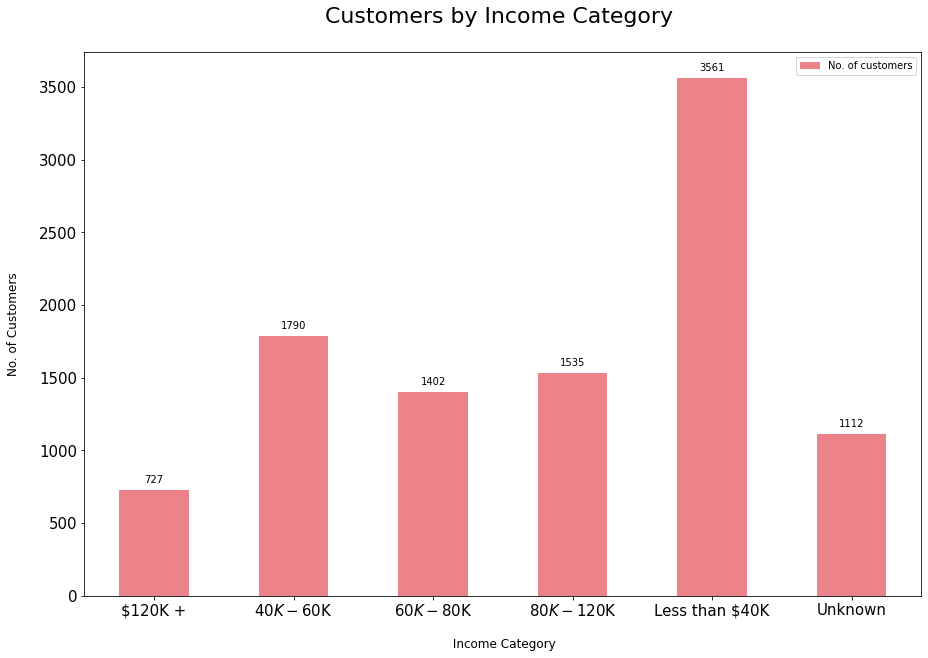

In [ ]:
Income_Category = dataset[[ "CLIENTNUM", "Income_Category"]]
sectors = Income_Category.groupby ("Income_Category")
Income_Category  = pd.DataFrame(sectors["CLIENTNUM"].count())
Income_Category.rename(columns={'CLIENTNUM':'No. of customers'}, inplace=True)
ax =  Income_Category [["No. of customers"]].plot.bar(title = 'Customers by Income Category', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10),color ='#ec838a', fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Income Category',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Income Category \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(Income_Category [["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)
     
        ax.annotate(label,
        (x_value, y_value),         
        xytext=(0, space),textcoords="offset points", 
        ha='center',va=va)
add_value_labels(ax)

###Education Level VS Customers

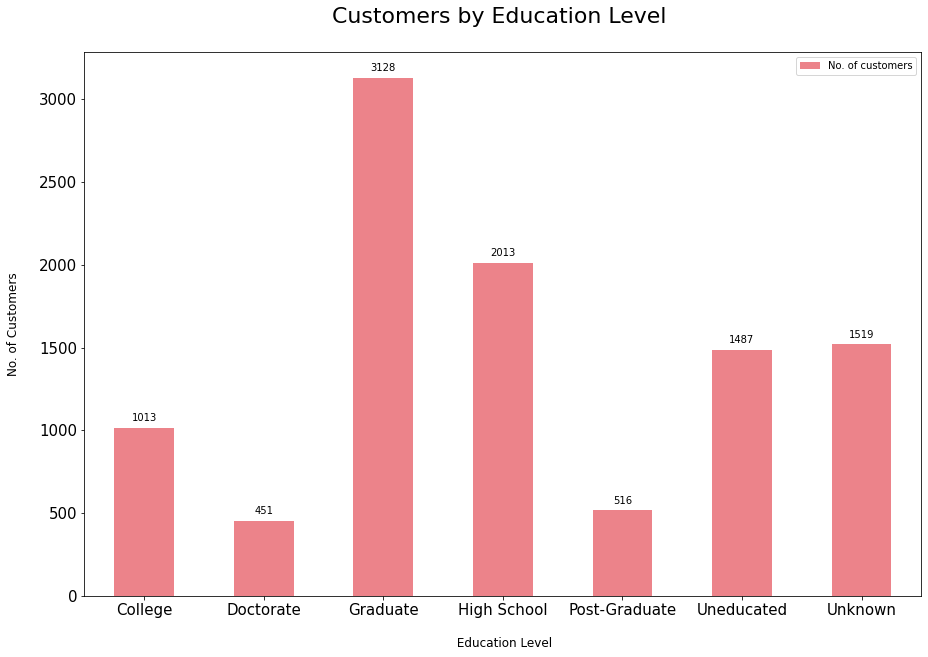

In [ ]:
Education_Level = dataset[[ "CLIENTNUM", "Education_Level"]]
sectors = Education_Level.groupby ("Education_Level")
Education_Level  = pd.DataFrame(sectors["CLIENTNUM"].count())
Education_Level.rename(columns={'CLIENTNUM':'No. of customers'}, inplace=True)
ax =  Education_Level [["No. of customers"]].plot.bar(title = 'Customers by Education Level', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10),color ='#ec838a', fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Education Level',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Education Level \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(Education_Level [["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)
     
        ax.annotate(label,
        (x_value, y_value),         
        xytext=(0, space),textcoords="offset points", 
        ha='center',va=va)
add_value_labels(ax)

###Churn Graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


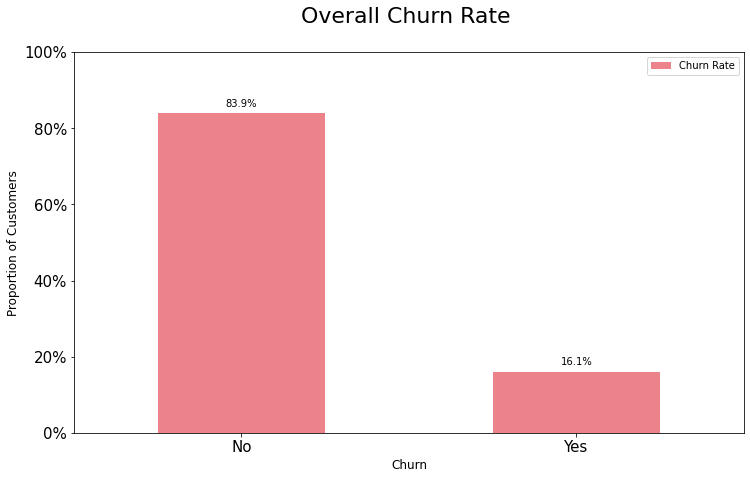

In [ ]:
churn_rate = dataset[['Attrition_Flag', 'CLIENTNUM']]
churn_rate ["churn_label"] = pd.Series(
np.where((churn_rate['Attrition_Flag'] == 1), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["Attrition_Flag"].count())
churn_rate ["Churn Rate"] = (
churn_rate ["Attrition_Flag"]/ sum(churn_rate ["Attrition_Flag"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, 
ylim =(0,100))
plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["Attrition_Flag"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
        ax.annotate(label,
        (x_value, y_value),         
        xytext=(0, space),
        textcoords="offset points", 
        ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

###Card Churn percentage

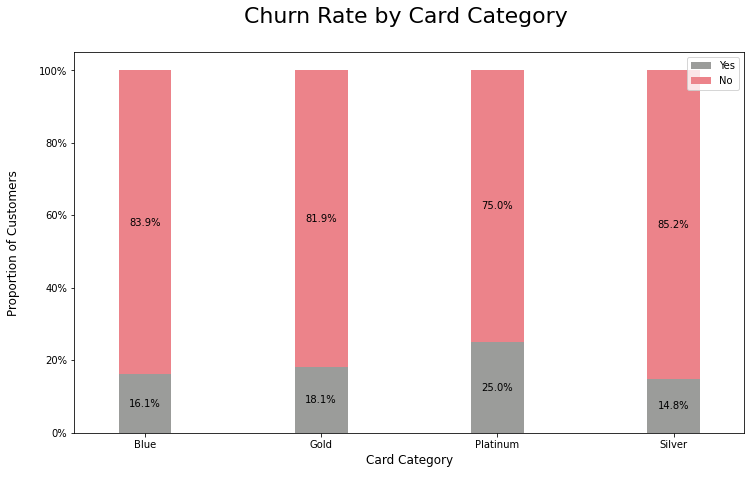

In [ ]:
Card_churn =dataset.groupby(['Card_Category','Attrition_Flag']).size().unstack()
Card_churn.rename(columns={1:'No', 0:'Yes'}, inplace=True)
colors  = ['#9b9c9a','#ec838a']
ax = (Card_churn.T*100.0 / Card_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Card Category\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Card Category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

###Correlation With Churn Rate

Most Positive Correlations: 
 Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290286
Total_Revolving_Bal         0.263053
Avg_Utilization_Ratio       0.178605
Total_Trans_Amt             0.168598
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131270
Gender                      0.037272
Credit_Limit                0.023873
Avg_Open_To_Buy             0.000285
dtype: float64

Most Negative Correlations: 
 Years_on_Book            -0.010696
Months_on_book           -0.013687
Customer_Age             -0.018203
Dependent_count          -0.018991
Months_Inactive_12_mon   -0.152449
Contacts_Count_12_mon    -0.204491
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

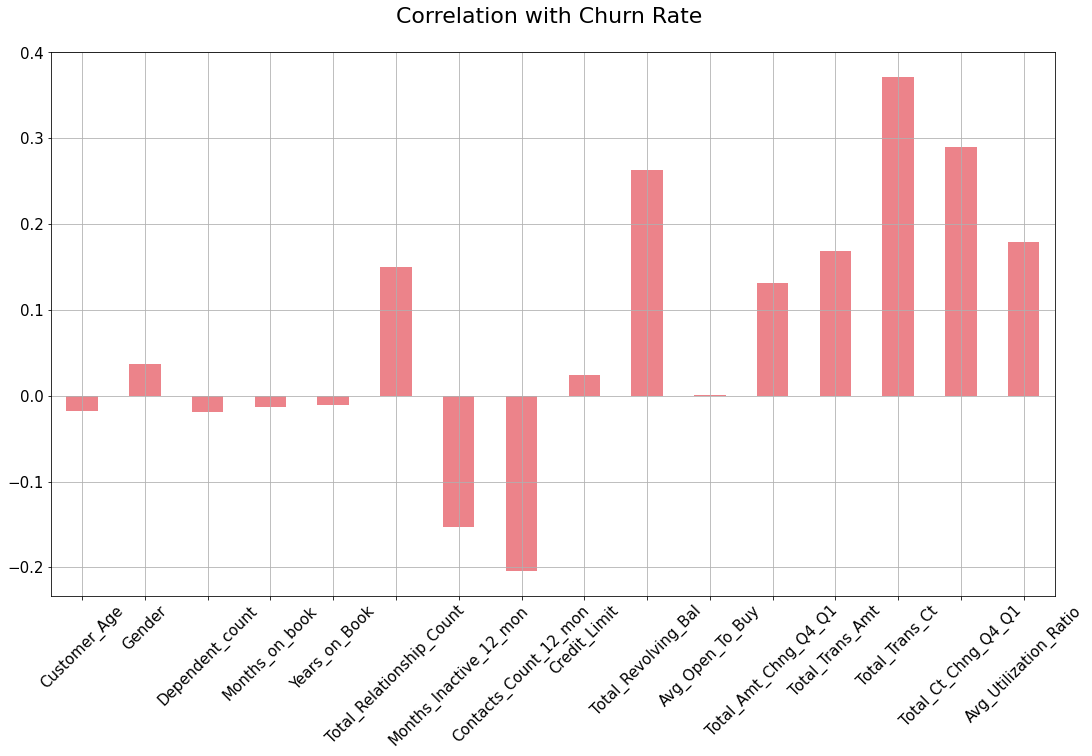

In [ ]:
correlations = dataset2.corrwith(dataset.Attrition_Flag)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

###Correlation of Attributes

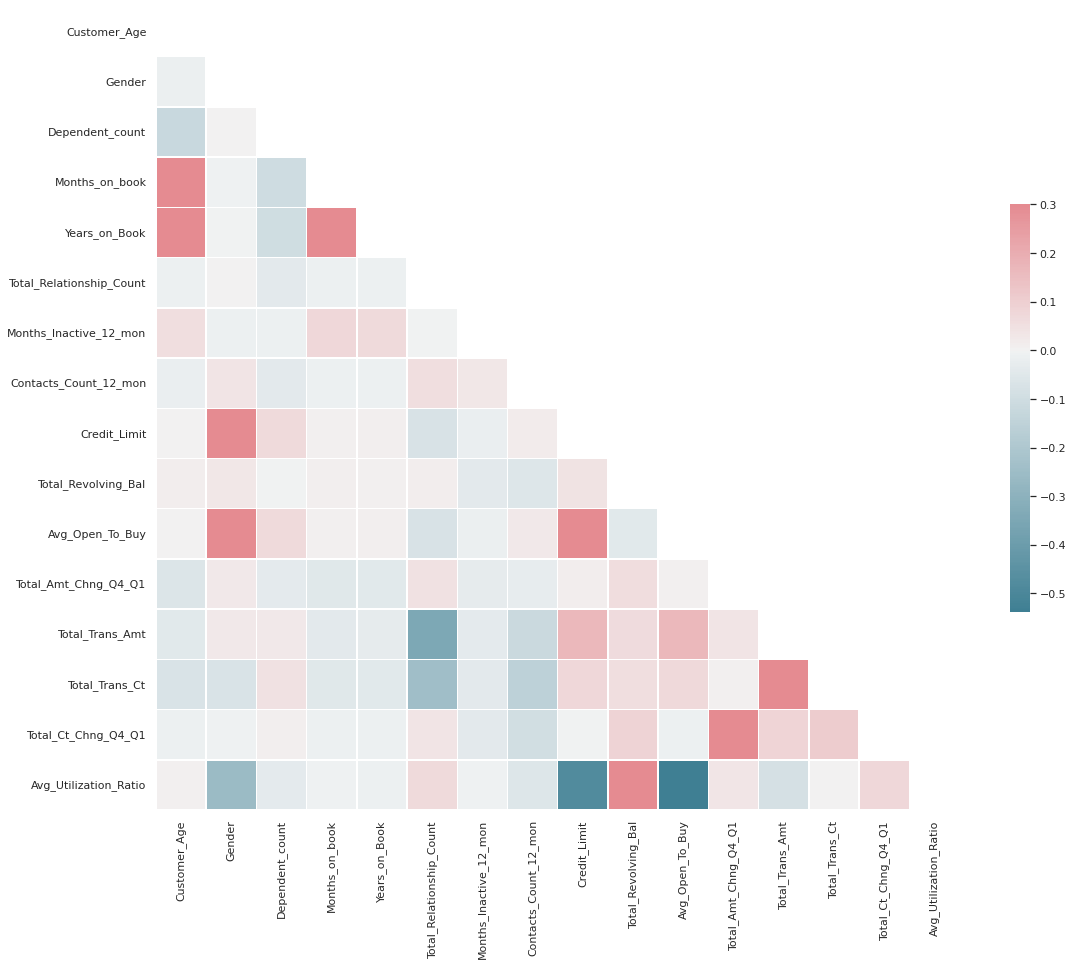

In [ ]:
sn.set(style="white")
corr = dataset2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

###Collinearity of Attributes

Text(0.5, 1.0, 'Collinearity of Monthly Charges and Total Charges \n')

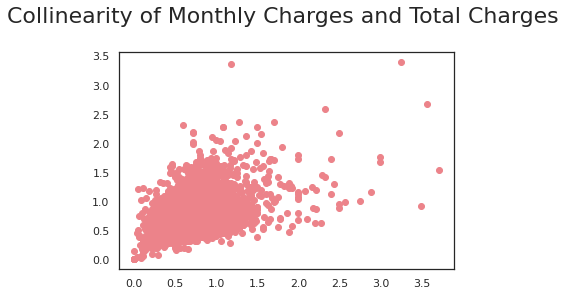

In [ ]:
plt.scatter(x =dataset2['Total_Ct_Chng_Q4_Q1'],y=dataset['Total_Amt_Chng_Q4_Q1'], color =  '#ec838a')
plt.title('Collinearity of Monthly Charges and Total Charges \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

##Data PreModelling

###Seperate Client Number From MAin Dataset to prevent dummy data conversion errors

In [11]:
identity = dataset["CLIENTNUM"]
dataset = dataset.drop(columns="CLIENTNUM")

###Convert categorical variable into dummy variables

In [12]:
dataset= pd.get_dummies(dataset)

###Join Client Number Back to the Dataset

In [13]:
dataset = pd.concat([dataset, identity], axis = 1)
dataset.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Years_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,CLIENTNUM
0,0,46,0,3,36,3,4,2,3,34516.0,154,34362.0,0.60,1987,46,0.59,0.00,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,710812533
1,0,34,1,0,24,2,1,2,3,34516.0,400,34116.0,0.20,5112,49,0.26,0.01,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,714145233
2,0,43,1,1,37,3,4,2,3,25517.0,321,25196.0,0.77,2508,44,0.29,0.01,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,798022683
3,0,54,1,1,44,4,1,3,3,9580.0,132,9448.0,0.32,5385,51,0.31,0.01,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,714294183
4,0,52,1,0,39,3,5,3,3,34516.0,216,34300.0,0.56,2395,47,0.31,0.01,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,720815208


###Identify response variable

In [14]:
response = dataset['Attrition_Flag']
dataset = dataset.drop(columns='Attrition_Flag')

###SPLIT Data to TEst and Train Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8101, 38)
Number transactions y_train dataset:  (8101,)
Number transactions X_test dataset:  (2026, 38)
Number transactions y_test dataset:  (2026,)


###Taking out the client Identifier(Irrelevant to Prediction

In [16]:
train_identity = X_train['CLIENTNUM']
X_train = X_train.drop(columns = ['CLIENTNUM'])
test_identity = X_test['CLIENTNUM']
X_test = X_test.drop(columns = ['CLIENTNUM'])

###Converting Data to Scalar form(For Accuracy Purposes)

In [17]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

##Modelling

###Import Models

In [18]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

###Evaluate Model Results

In [19]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD','Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0,shuffle=True)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_auc_results.std()*100, 2),round(cv_acc_results.mean()*100, 2),round(cv_acc_results.std()*100, 2)]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,98.74,0.31,95.86,0.81
2,Kernel SVM,94.23,1.14,91.59,1.04
0,Logistic Regression,92.47,0.99,84.64,1.43
1,SVC,91.96,1.06,90.58,0.99
5,Decision Tree Classifier,88.56,1.94,93.72,1.16
4,Gaussian NB,85.59,1.76,88.00,1.43
3,KNN,78.59,1.68,86.56,1.03


###Optimal Number of K Neighbors

No handles with labels found to put in legend.


(array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88]),
 <a list of 9 Text major ticklabel objects>)

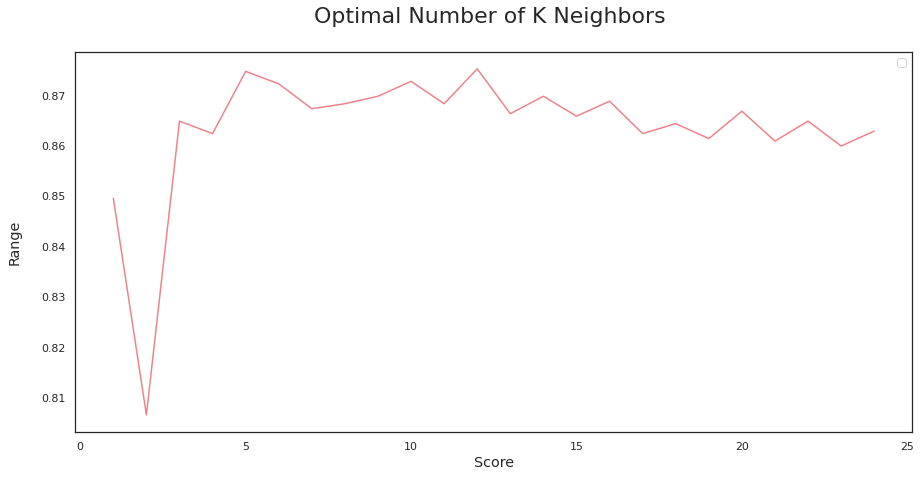

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Optimal Number of Trees for Random Forest Model

No handles with labels found to put in legend.


(array([0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97]),
 <a list of 9 Text major ticklabel objects>)

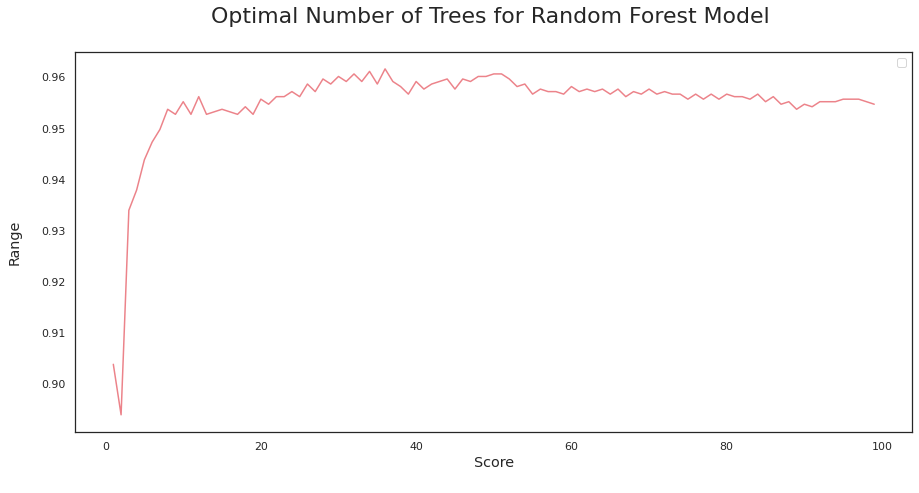

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Fitting Logistic Regression to the Training set

In [20]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.902764   0.924859  0.962375  0.943244   0.95463


###Fitting SVM (SVC class) to the Training set

In [21]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.902764   0.924859  0.962375  0.943244   0.95463
1         SVM (Linear)  0.902764   0.924859  0.962375  0.943244   0.95463


###Fitting KNN to the Training set:

In [22]:
classifier = KNeighborsClassifier(
n_neighbors = 8, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.902764   0.924859  0.962375  0.943244  0.954630
1          SVM (Linear)  0.902764   0.924859  0.962375  0.943244  0.954630
2  K-Nearest Neighbours  0.868213   0.879365  0.977072  0.925647  0.955832


###Fitting Naive Byes to the Training set

In [23]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.902764   0.924859  0.962375  0.943244  0.954630
1          SVM (Linear)  0.902764   0.924859  0.962375  0.943244  0.954630
3            Naive Byes  0.884008   0.922235  0.941211  0.931626  0.937354
2  K-Nearest Neighbours  0.868213   0.879365  0.977072  0.925647  0.955832


###Fitting Decision Tree to the Training set

In [24]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
4         Decision Tree  0.942744   0.963721  0.968254  0.965982  0.967344
0   Logistic Regression  0.902764   0.924859  0.962375  0.943244  0.954630
1          SVM (Linear)  0.902764   0.924859  0.962375  0.943244  0.954630
2            Naive Byes  0.884008   0.922235  0.941211  0.931626  0.937354
3  K-Nearest Neighbours  0.868213   0.879365  0.977072  0.925647  0.955832


###Fitting Random Forest to the Training set

In [25]:
classifier = RandomForestClassifier(n_estimators = 45, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Random Forest', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Accuracy","Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
5         Random Forest  0.953603   0.957835  0.988242  0.972801  0.982007
0         Decision Tree  0.942744   0.963721  0.968254  0.965982  0.967344
1   Logistic Regression  0.902764   0.924859  0.962375  0.943244  0.954630
2          SVM (Linear)  0.902764   0.924859  0.962375  0.943244  0.954630
3            Naive Byes  0.884008   0.922235  0.941211  0.931626  0.937354
4  K-Nearest Neighbours  0.868213   0.879365  0.977072  0.925647  0.955832


###TOP MODEL 

In [26]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.95 (+/- 0.02)


###Prediction Confusion Matrix

Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

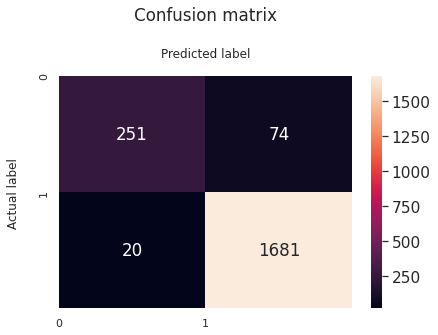

In [ ]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

###Plot Randomforest  ROC

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

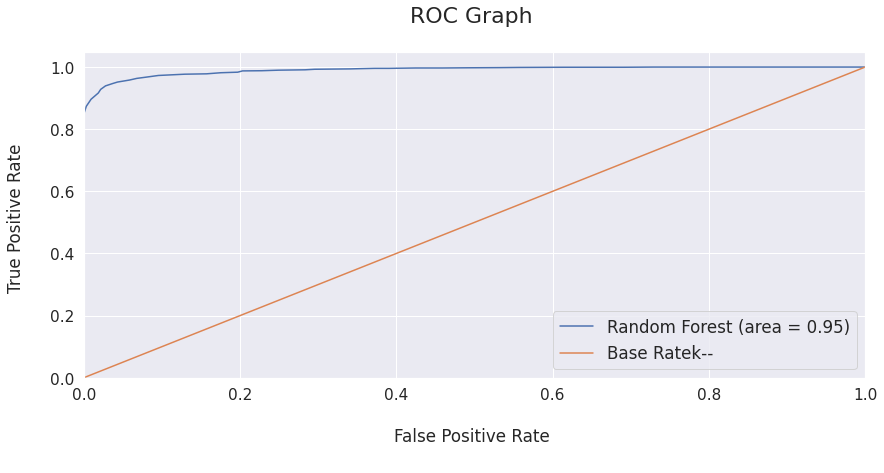

In [ ]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Randomforest  ROC
plt.plot(rf_fpr, rf_tpr, 
label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

###Analyzing Coefficients

In [ ]:
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'CLIENTNUM').columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.feature_importances_), 
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
12,Total_Trans_Amt,0.197391
13,Total_Trans_Ct,0.170393
9,Total_Revolving_Bal,0.100200
14,Total_Ct_Chng_Q4_Q1,0.084689
11,Total_Amt_Chng_Q4_Q1,0.062185
5,Total_Relationship_Count,0.055730
15,Avg_Utilization_Ratio,0.054265
10,Avg_Open_To_Buy,0.036778
8,Credit_Limit,0.035708
0,Customer_Age,0.035028


###Prepare to Optimize Model

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


###Optimizing The Model

In [28]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    some = np.nan_to_num((errors / y_test),nan=np.nan, posinf=np.nan)
    mape = 100 *  np.nanmean(some)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 52.0min finished


Model Performance
Average Error: 0.0518 degrees.
Accuracy = 98.00%.
Model Performance
Average Error: 0.0420 degrees.
Accuracy = 98.88%.
Improvement of 0.90%.


###probability score

In [29]:
y_pred_probs = best_random.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
y_pred_new = best_random.predict(X_test)

###Revalidate final results with Confusion Matrix

[[ 251   74]
 [  20 1681]]
Test Data Accuracy: 0.9536


<Figure size 2016x1440 with 0 Axes>

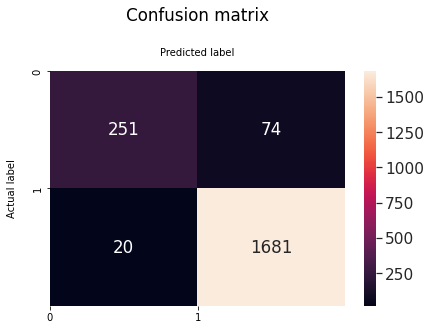

In [30]:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

##FINAL Results

In [31]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results['new_pred']= y_pred_new
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
final_results

,CLIENTNUM,Attrition_Flag,predictions,new_pred,propensity_to_churn(%),Ranking
6804,797232183,1,1,1,100.00,1
1428,712375758,1,1,1,99.44,3
2078,772466508,0,1,1,60.49,9
7404,718516533,1,1,1,100.00,1
6363,818497758,1,1,1,98.22,5
...,...,...,...,...,...,...
2539,790102008,1,1,1,100.00,1
9666,714024858,1,1,1,91.03,8
3346,710878308,0,1,1,81.74,8
4351,711909933,1,1,1,99.39,3


#### Random Forest Tree

In [37]:
from sklearn.tree import export_graphviz
estimator = best_random.estimators_[5]


In [49]:
export_graphviz(estimator,out_file='new_tt_tree.dot', max_depth = 3,feature_names = dataset.drop(columns = 'CLIENTNUM').columns,class_names = 'Attrited_Customers',rounded = True, proportion = False, precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'new_tt_tree.dot', '-o', 'new_tt_tree.jpg', '-Gdpi=600'])

0

In [50]:
from IPython.display import Image
Image(filename = 'new_tt_tree.jpg')